In [12]:
!pip install pandas numpy matplotlib seaborn scikit-learn plotly


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

plt.style.use('seaborn-v0_8')


In [14]:
from google.colab import files
uploaded = files.upload()  # Select your zomato.csv file


Saving zomato.csv to zomato (1).csv


In [15]:
# zomato file
df = pd.read_csv('zomato.csv', encoding='latin-1')

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (9551, 21)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [16]:
# Fill missing values
df['Aggregate rating'] = df['Aggregate rating'].fillna(df['Aggregate rating'].median())
df['Votes'] = df['Votes'].fillna(0)
df['Cuisines'] = df['Cuisines'].fillna('Unknown')

# Optional: create a simple feature for number of cuisines
df['Cuisine_Count'] = df['Cuisines'].str.count(',') + 1

# Check final dataset
df[['Restaurant Name','Cuisines','Aggregate rating','Votes','Cuisine_Count']].head()


,Restaurant Name,Cuisines,Aggregate rating,Votes,Cuisine_Count
0,Le Petit Souffle,"French, Japanese, Desserts",4.8,314,3
1,Izakaya Kikufuji,Japanese,4.5,591,1
2,Heat - Edsa Shangri-La,"Seafood, Asian, Filipino, Indian",4.4,270,4
3,Ooma,"Japanese, Sushi",4.9,365,2
4,Sambo Kojin,"Japanese, Korean",4.8,229,2


In [17]:
# Choose features for clustering
X = df[['Aggregate rating','Votes','Cuisine_Count']]

# Include cost if available
if 'Average Cost for two' in df.columns:
    X['Average Cost for two'] = df['Average Cost for two'].fillna(df['Average Cost for two'].median())

X.head()


/tmp/ipython-input-2982903854.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Average Cost for two'] = df['Average Cost for two'].fillna(df['Average Cost for two'].median())


,Aggregate rating,Votes,Cuisine_Count,Average Cost for two
0,4.8,314,3,1100
1,4.5,591,1,1200
2,4.4,270,4,4000
3,4.9,365,2,1500
4,4.8,229,2,1500


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features scaled successfully!")


Features scaled successfully!


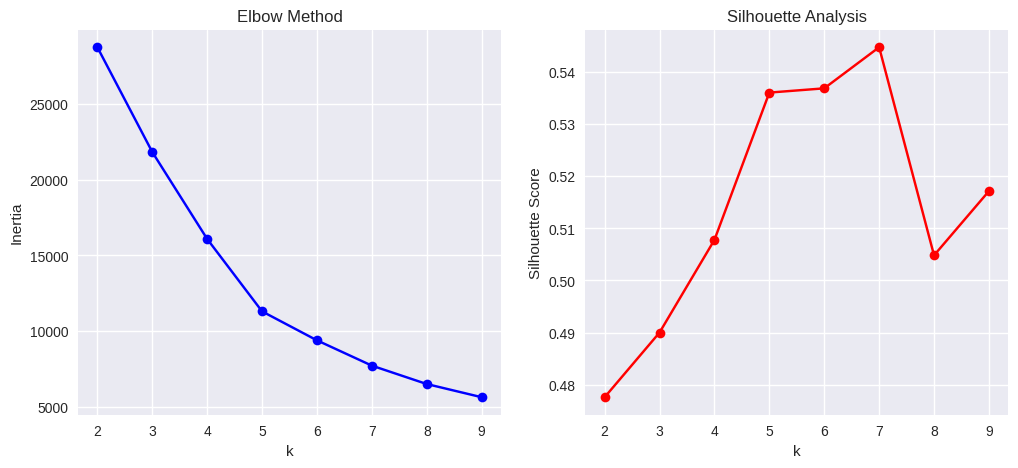

In [19]:
inertias = []
sil_scores = []

for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Plot results
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(2,10), inertias, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(range(2,10), sil_scores, 'ro-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()


In [20]:
k = 5  # Replace with optimal k
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = labels
print(df['Cluster'].value_counts())


Cluster
0    4864
2    2314
1    2141
4     217
3      15
Name: count, dtype: int64


In [21]:
for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster']==cluster]
    print(f"\nCluster {cluster} ({len(cluster_data)} restaurants)")
    print(f"Average Rating: {cluster_data['Aggregate rating'].mean():.2f}")
    print(f"Top Cuisines: {cluster_data['Cuisines'].value_counts().head(3).to_dict()}")



Cluster 0 (4864 restaurants)
Average Rating: 3.38
Top Cuisines: {'North Indian': 485, 'North Indian, Chinese': 392, 'North Indian, Mughlai': 284}

Cluster 1 (2141 restaurants)
Average Rating: 0.00
Top Cuisines: {'North Indian': 444, 'Chinese': 130, 'Fast Food': 126}

Cluster 2 (2314 restaurants)
Average Rating: 3.48
Top Cuisines: {'North Indian, Mughlai, Chinese': 162, 'North Indian, Chinese, Fast Food': 61, 'Bakery, Desserts, Fast Food': 60}

Cluster 3 (15 restaurants)
Average Rating: 4.39
Top Cuisines: {'Sunda, Indonesian': 3, 'Peranakan, Indonesian': 1, 'Korean': 1}

Cluster 4 (217 restaurants)
Average Rating: 4.23
Top Cuisines: {'North Indian, Mughlai': 10, 'North Indian': 7, 'North Indian, Chinese': 5}


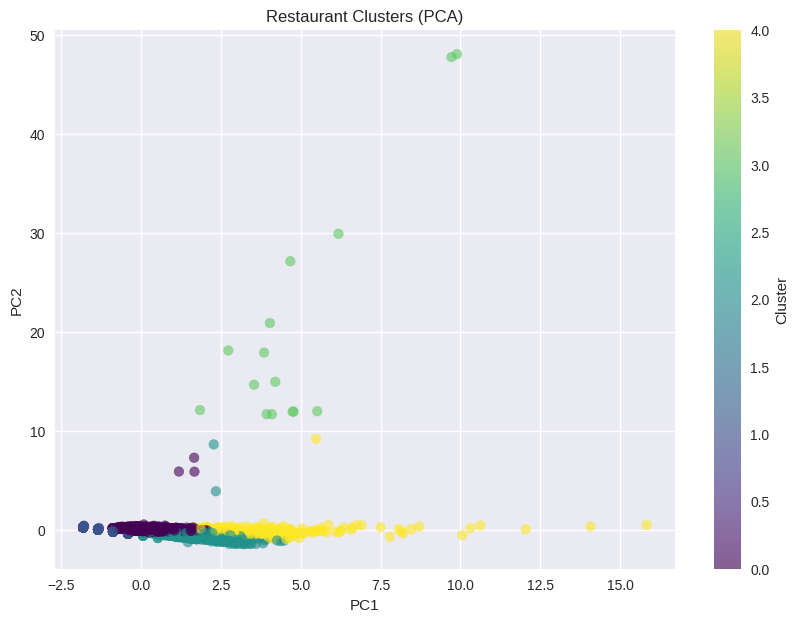

In [22]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,7))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', alpha=0.6)
plt.title('Restaurant Clusters (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()
